# **Support Vector Machines**
___
## Notes For LUNA-R and Educational Purposes
MIT License

## **Why?**
Why do we use Support Vector Machines?<br>
They are just incredibly useful and accurate<br>
- They Maximize Margin (later on discussed)
- They can handle outliers (Soft Margin SVMs)
- They can use Dimension Transitions (Kernel Functions) to classify Linearly Unseparable data

## **How?**
Firstly discovered by Soviet Computer Scientist Vladimir Vapnik in early 90s.<br>
Links to Interview:<br>
<a href='https://www.youtube.com/watch?v=STFcvzoxVw4'>Click here</a><br>
<a href='https://www.youtube.com/watch?v=bQa7hpUpMzM'>Click here</a><br>
<a href='https://www.youtube.com/watch?v=Ow25mjFjSmg'>MIT speech on statistical Learning</a><br>
___
# Idea of Method:<br>

Separate our data via *hyperplane* with maximum and equal distance (*margin*) from *Support Vectors*.<br>

<img src='https://www.researchgate.net/publication/331308937/figure/fig1/AS:870140602249216@1584469094771/Illustration-of-support-vector-machine-SVM-to-generalize-the-optimal-separating.ppm' width=50%><br>
Idea seems to be pretty easy, but it appears surprisingly efficient!<br>
### Avoid Closeness
(sounds like quote of sociopath or virgin)<br>

If we're close to one of *Support Vectors* we have high chance of misclassification.<br>
In this way we want to find Decision Boundary distanced from both *Support Vectors*
<br>

## **Math**
Math of this method is not tough in general, but tough to understand, so in order to avoid overcomplexity I will skip some parts here.<br>
If you want full Math Explanation watch this <a href='https://www.youtube.com/watch?v=_PwhiWxHK8o'>brilliant Lecture</a><br>

We can formulate a fairly simple decision rule:<br>
$$\vec w \cdot \vec u + b \ge 0$$
when +<br>

We will label negative samples with -1 and positives with 1<br>

$$\begin{equation}
    \begin{cases}
      \vec w \cdot \vec x + b \ge 1\\
      \vec w \cdot \vec x + b \le -1
    \end{cases}\,,
\end{equation}$$

That can be simplified to:<br>
$$y_i(\vec w \cdot \vec x + b)$$
where $y_i$ is dataset label (-1 or 1)<br>
___
From here we can get:<br>
$$y_i(\vec w \cdot \vec x + b) - 1 = 0$$
___
Now we need to calculate width we will be simplifying:<br>
$$width = (X_+ - X_-) \cdot {\vec w \over ||w||}$$
It is simplified to:
$$2 \over ||w||$$
(from our previous equation)<br>

We remember that we need to maximize it.
$$Max {2 \over ||w||}$$
or
$$Min {1 \over 2}||w||^2$$
(for computational convenience we add these derivative reducers)
___
## Key Formulas to use (with soft margin SVM)<br>

**Loss Function:**<br>
$$J_i = λ||w||^2+{1 \over 2}∑max(0, 1-y_i(w \cdot x_i - b))$$
__<br>
where $λ||w||^2$ is a regularization term and ${1 \over 2}∑max(0, 1-y_i(w \cdot x_i - b))$ hinge loss<br>

**Gradients:**

if $y_i \cdot f(x) \ge 1$:<br>
  $${dJ_i \over dw_k} = 2λw_k$$
  $${dJ_i \over db} = 0$$
else:<br>
  $${dJ_i \over dw_k} = 2λw_k - y_i \cdot x_{ik}$$
  $${dJ_i \over db} = y_i$$

___

## **Kernels:**
Sometimes our data can not be linearly separated.<br>
<img src='https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2021/02/Linearly_Separable_Data_Example.png?fit=539,234&ssl=1'><br>

Then we can apply special *Kernel Function* in order to transform our low dimensional data into high dimensional in order to find Hyperplane that splits this data. After converting this solution back to low dimensional data we get non-linear solution.<br>

Here's a great visualization for one of the functions (radial basis function):<br>
https://www.youtube.com/watch?v=OdlNM96sHio<br>

There are 3 main and popular kernels to use:<br>
1. Polynomial
2. Gaussian Radial Basis Function (RBF)
3. Sigmoid Kernel



## **Let's implement it!**

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

Soft-Margin SVM classifier (SVC)<br>

In [54]:
class SVC:
  def __init__(self, lr=0.001, lambda_coef=0.001):
    self.lr = lr
    self.lambda_coef = lambda_coef
    self.w = None
    self.b = None

  def fit(self, X, y, n_iters):
    n_samples, n_features = X.shape

    y = np.where(y >= 1, 1, -1)

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(n_iters):
      for i, x_i in enumerate(X):
        if y[i] * (np.dot(x_i, self.w) - self.b) >= 1:
          self.w -= self.lr * 2 * (self.lambda_coef * self.w)
        else:
          self.w -= self.lr * 2 * (self.lambda_coef * self.w - y[i] * x_i)
          self.b -= self.lr * y[i]

  def predict(self, X):
    return np.sign(np.dot(X, self.w) - self.b)

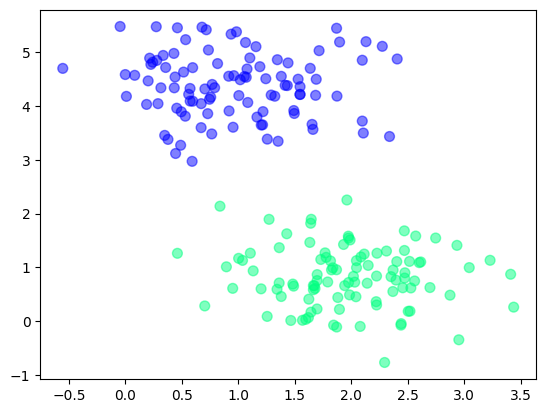

In [55]:
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.show();

In [56]:
svc = SVC()
svc.fit(X1, y1, 500)

In [57]:
y_pred = svc.predict(X1)
print(y_pred)

[ 1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.
  1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.
  1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.
  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
  1. -1.  1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.
 -1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1.
 -1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.
  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1. -1.
 -1. -1.]


### **Non Linear SVMs with Kernels**
We know that our goal in primal form of SVM is defined as:<br>
$$Min {1 \over 2}||w||^2$$
However we can define it in dual form with Lagrange multipliers. Lagrange multipliers are just one of the ways of function optimization.<br>
In Lagrangian form:<br>
$$L = {1 \over 2} ||w||^2 - \sum a_i[y_i(\vec w \cdot \vec x + b) - 1]$$

Calculating partial derivatives gives us:<br>
$$\vec w = \sum a_i y_i x_i$$
Meaning w is calculated as linear sum of some samples
from Derivative with respect to b we get:<br>
$$\sum a_i y_i = 0$$
Plugging our $\vec w$ to $L$ equation we get:
$$L = \sum a_i - {1 \over 2} \sum_i \sum_j a_i a_j y_i y_j x_i x_j$$

And that's our Loss Function!
$$L = \sum a_i - {1 \over 2} \sum_i \sum_j a_i a_j y_i y_j x_i x_j$$
___
**Gradients** <br>
As we're working in dual form we need to update alpha<br>
$${dL \over da_k} = 1 - y_k \sum a_j y_j K(x_j, x_k)$$
K is our Kernel Function.
___
**Updating Values** <br>
$$a = a + lr({dL \over da_k})$$
___
**Predict**
$$\hat y = sign(\sum a_i y_i k(x_i, x_i) + b)$$
___
Kernels I'll implement:<br>
1. Polynomial Kernel
2. Gaussian Kernel

Polynomial:<br>
$$(c + X \cdot y)^d$$
Gaussian:<br>
$$e^{-1/ σ^2 ||X-y||^2}$$

In [58]:
class SVM:
  def __init__(self, kernel='rbf', degree=2, sigma=0.1, epochs=100, lr=0.001):
    self.a = None
    self.b = 0
    self.degree = degree
    self.c = 1
    self.sigma = sigma
    self.epochs = 100
    self.lr = lr

    if kernel.lower() == 'rbf':
      self.kernel = self.gaussian_kernel
    elif kernel.lower() == 'poly':
      self.kernel = self.polynomial_kernel

  def fit(self, X, y):
    self.X = X
    self.y = y

    n_samples, n_features = X.shape
    self.a = np.zeros(n_samples)
    self.b = 0
    self.ones = np.ones(n_samples)

    y_mul_k = np.outer(y, y) * self.kernel(X, X)

    for _ in range(self.epochs):
      da = self.ones - y_mul_k.dot(self.a)
      self.a += self.lr * da
      # alpha can't be negative
      self.a[self.a > 1] = 1
      self.a[self.a < 0] = 0

      # finally...
      # Calculate b:
      alpha_index = np.where((self.a) > 0 & (self.a < 1))[0]

      b_list = []
      for index in alpha_index:
          b_list.append(y[index] - (self.a * y).dot(self.kernel(X, X[index])))

      self.b = np.mean(b_list)

  def polynomial_kernel(self, X, Z):
    return (self.c + X.dot(Z.T)) ** self.degree

  def gaussian_kernel(self, X, Z):
    return np.exp(-(1 / (self.sigma ** 2)) * np.linalg.norm(X[:, np.newaxis] - Z[np.newaxis, :], axis=2) ** 2)

  def predict(self, X):
    decision = (self.a * self.y).dot(self.kernel(self.X, X)) + self.b
    return np.sign(decision)

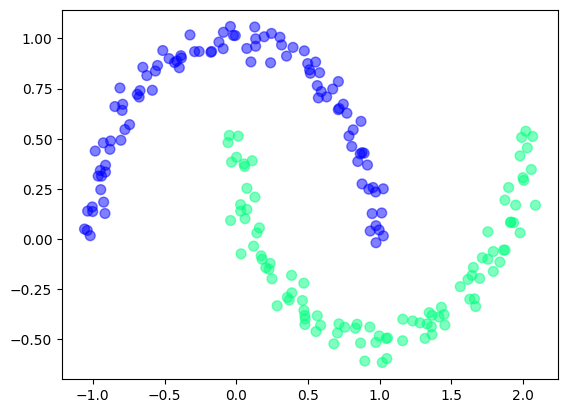

In [59]:
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.show();

In [60]:
svm_dual = SVM(kernel = 'rbf')
svm_dual.fit(X2, y2)

In [61]:
y_pred = svm_dual.predict(X2)
print(y_pred)

[-1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.
  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.
  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1. -1.
  1.  1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1.  1.
 -1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1.
 -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.
  1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.
 -1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1. -1. -1.
  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.
 -1.  1.]


In [62]:
print(y2)

[-1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1
 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1  1
  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1  1  1
 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1
  1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1
 -1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1  1
 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1 -1
  1  1  1  1 -1 -1 -1  1]


In [63]:
for i in range(len(y_pred)):
  if y_pred[i] != y2[i]: print('ZHOPA')

No Zhopa, No problem😎

<img src='https://media1.tenor.com/m/47qpxBq_Tw0AAAAd/cat-cat-meme.gif' width=20%>
<img src='https://media1.tenor.com/m/47qpxBq_Tw0AAAAd/cat-cat-meme.gif' width=20%>
<img src='https://media1.tenor.com/m/47qpxBq_Tw0AAAAd/cat-cat-meme.gif' width=20%>
<br>

___

Additional info:<br>
Code inspiration: https://www.kaggle.com/code/prabhat12/svm-from-scratch
<br>
MIT Lecture: https://www.youtube.com/watch?v=_PwhiWxHK8o
<br>

More about Dual SVM:<br>
http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-duality-problem/
<br>
http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-kernel-svm/
<br>

http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-training-algorithms/